In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
import numpy as np
import os

### Load the experiment and corresponding libraries

In [3]:
sys.path.append("/")  # enable import of "recipe"
os.chdir("/work/")

In [4]:
from recipes.main import load_experiment
experiment = load_experiment(recipe="_2020_04_06_robustness", 
                             experiment="representation_analysis", 
                             schema="",  # schema name will automatically be generated from recipe and experiment names 
                             base_dir="../", 
                             import_prefix="recipes.", 
                             dev_mode=True  
                            )

Connecting anix@sinzlab.chlkmukhxp6i.eu-central-1.rds.amazonaws.com:3306


In [5]:
from bias_transfer.tables.trained_model import *
from bias_transfer.tables.trained_transfer_model import *
schema

Schema `anix_nnfabrik_2020_04_06_robustness`

In [ ]:
from bias_transfer.analysis.representation_analysis import RepresentationAnalyser

for exp in experiment.experiments.values():
        analyser = RepresentationAnalyser(experiment=exp,
                                          table=TrainedModel(),
                                          dataset="val",
                                          plot_style="lightpaper")
        analyser.run("corr") 

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Model with 23520842 parameters.
==> Computing Representations
Compute representation of clean input


Eval Epoch 0: 100%|██████████| 79/79 [00:02<00:00, 29.82it/s, acc=91.7, loss=0.302]

Acc: 91.72 Loss: 0.30173970193048066
Compute representation of noisy input



Eval Epoch 0: 100%|██████████| 79/79 [00:02<00:00, 29.55it/s, acc=91.7, loss=0.305]

Acc: 91.72 Loss: 0.3053683184936077


Found existing corr result that will be loaded now


/usr/local/lib/python3.7/dist-packages/seaborn/utils.py:279: UserWarning: Use the colorbar set_ticks() method instead.
  ax_i.set_yticks(newticks)


==> Computing Representations
Representation of clean input already in memory
Compute representation of noisy input


Eval Epoch 0: 100%|██████████| 79/79 [00:02<00:00, 28.12it/s, acc=89.8, loss=0.363]

Acc: 89.76 Loss: 0.3630453273653984


Found existing corr result that will be loaded now
==> Computing Representations
Representation of clean input already in memory
Compute representation of noisy input


Eval Epoch 0: 100%|██████████| 79/79 [00:02<00:00, 27.90it/s, acc=87.3, loss=0.444]

Acc: 87.34 Loss: 0.44352841264084925


Found existing corr result that will be loaded now
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Model with 23520842 parameters.
==> Computing Representations
Compute representation of clean input


Eval Epoch 0: 100%|██████████| 79/79 [00:02<00:00, 29.19it/s, acc=90.9, loss=0.343]

Acc: 90.92 Loss: 0.34330645571403867
Compute representation of noisy input



Eval Epoch 0: 100%|██████████| 79/79 [00:02<00:00, 29.68it/s, acc=90.9, loss=0.349]

Acc: 90.92 Loss: 0.34886042236150067


tensor(1.0000, device='cuda:0')


/usr/local/lib/python3.7/dist-packages/seaborn/utils.py:279: UserWarning: Use the colorbar set_ticks() method instead.
  ax_i.set_yticks(newticks)


==> Computing Representations
Representation of clean input already in memory
Compute representation of noisy input


Eval Epoch 0: 100%|██████████| 79/79 [00:02<00:00, 31.62it/s, acc=89.3, loss=0.386]

Acc: 89.28 Loss: 0.3859463777345947


tensor(1.0000, device='cuda:0')
==> Computing Representations
Representation of clean input already in memory
Compute representation of noisy input


Eval Epoch 0: 100%|██████████| 79/79 [00:02<00:00, 31.68it/s, acc=87.3, loss=0.444]

Acc: 87.3 Loss: 0.4442837836244438


tensor(1.0000, device='cuda:0')
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Model with 23520842 parameters.
==> Computing Representations
Compute representation of clean input


Eval Epoch 0: 100%|██████████| 79/79 [00:02<00:00, 31.19it/s, acc=91, loss=0.335]  

Acc: 91.04 Loss: 0.33515480608691145
Compute representation of noisy input



Eval Epoch 0: 100%|██████████| 79/79 [00:02<00:00, 31.56it/s, acc=91, loss=0.339]  

Acc: 91.04 Loss: 0.33867359576346


tensor(1.0000, device='cuda:0')


In [6]:
exp

TransferExperiment [
  {
    "dataset": {
      "DatasetConfig": {
        "apply_augmentation": true,
        "apply_normalization": true,
        "batch_size": 128,
        "comment": "CIFAR10",
        "data_dir": "./data/image_classification/torchvision/",
        "dataset_cls": "CIFAR10",
        "input_size": 32,
        "num_workers": 1,
        "pin_memory": true,
        "show_sample": false,
        "shuffle": true,
        "train_data_mean": [
          0.49139968,
          0.48215841,
          0.44653091
        ],
        "train_data_std": [
          0.24703223,
          0.24348513,
          0.26158784
        ],
        "valid_size": 0.1
      }
    },
    "model": {
      "ModelConfig": {
        "cnn_builder": "resnet",
        "comment": "CIFAR10",
        "conv_stem_kernel_size": 3,
        "core_stride": 1,
        "input_size": 32,
        "noise_adv_classification": false,
        "noise_adv_regression": false,
        "num_classes": 10,
        "pretrained": 

In [7]:
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__trained_model,55695c8863cb60591aac744ad05a613f,reserved,=BLOB=,,=BLOB=,anix@134.2.168.54,93da8d04af04,1,34194,2020-04-07 09:45:45
__trained_model,6fe69883893dab2e849c16246628974e,reserved,=BLOB=,,=BLOB=,anix@134.2.168.54,0b1c5ebd4b08,1,34196,2020-04-07 09:46:12
__trained_model,71c19c311e7cd3aa75db4b0bf51328f0,reserved,=BLOB=,,=BLOB=,anix@134.2.168.54,ec1fb03cb6a7,1,34197,2020-04-07 12:55:52
__trained_model,d01de79925102d81b599db45b86475d2,reserved,=BLOB=,,=BLOB=,anix@134.2.168.54,d661599c3bf8,1,34195,2020-04-07 12:45:32


#### Let's take a look at the individual experiments:

In [4]:
experiment.experiments.keys()

dict_keys([Description(name='ResNet: Clean', seed=8), Description(name='ResNet: Noise Augmented', seed=8), Description(name='ResNet: Transfer', seed=8), Description(name='ResNet: Noise Augmented + Repr. Matching', seed=8), Description(name='VGG: Clean', seed=8), Description(name='VGG: Noise Augmented', seed=8), Description(name='VGG: Transfer', seed=8), Description(name='VGG: Noise Augmented + Repr. Matching', seed=8), Description(name='ResNet: Clean', seed=13), Description(name='ResNet: Noise Augmented', seed=13), Description(name='ResNet: Transfer', seed=13), Description(name='ResNet: Noise Augmented + Repr. Matching', seed=13), Description(name='VGG: Clean', seed=13), Description(name='VGG: Noise Augmented', seed=13), Description(name='VGG: Transfer', seed=13), Description(name='VGG: Noise Augmented + Repr. Matching', seed=13), Description(name='ResNet: Clean', seed=42), Description(name='ResNet: Noise Augmented', seed=42), Description(name='ResNet: Transfer', seed=42), Description(

#### ...and similarly for the combined transfer experiments:

In [5]:
experiment.transfer_experiments.keys()

dict_keys([Description(name='ResNet: Clean', seed=8), Description(name='ResNet: Noise Augmented -> Transfer', seed=8), Description(name='ResNet: Noise Augmented + Repr Matching -> Transfer', seed=8), Description(name='VGG: Clean', seed=8), Description(name='VGG: Noise Augmented -> Transfer', seed=8), Description(name='VGG: Noise Augmented + Repr Matching -> Transfer', seed=8), Description(name='ResNet: Clean', seed=13), Description(name='ResNet: Noise Augmented -> Transfer', seed=13), Description(name='ResNet: Noise Augmented + Repr Matching -> Transfer', seed=13), Description(name='VGG: Clean', seed=13), Description(name='VGG: Noise Augmented -> Transfer', seed=13), Description(name='VGG: Noise Augmented + Repr Matching -> Transfer', seed=13), Description(name='ResNet: Clean', seed=42), Description(name='ResNet: Noise Augmented -> Transfer', seed=42), Description(name='ResNet: Noise Augmented + Repr Matching -> Transfer', seed=42), Description(name='VGG: Clean', seed=42), Description(

#### How does the specific experiment definition look like? Let's look at an example instance:

In [6]:
from bias_transfer.configs.base import Description

In [7]:
experiment.experiments[Description(name='CIFAR10: Noise Augmented + Repr. Matching', seed=42)]

Experiment {
  "dataset": {
    "DatasetConfig": {
      "apply_augmentation": true,
      "apply_normalization": false,
      "batch_size": 128,
      "comment": "CIFAR10",
      "data_dir": "./data/image_classification/torchvision/",
      "dataset_cls": "CIFAR10",
      "input_size": 32,
      "num_workers": 1,
      "pin_memory": true,
      "show_sample": false,
      "shuffle": true,
      "train_data_mean": [
        0.49139968,
        0.48215841,
        0.44653091
      ],
      "train_data_std": [
        0.24703223,
        0.24348513,
        0.26158784
      ],
      "valid_size": 0.1
    }
  },
  "model": {
    "ModelConfig": {
      "cnn_builder": "resnet",
      "comment": "CIFAR10",
      "conv_stem_kernel_size": 3,
      "core_stride": 1,
      "input_size": 32,
      "noise_adv_classification": false,
      "noise_adv_regression": false,
      "num_classes": 10,
      "pretrained": false,
      "type": "50"
    }
  },
  "seed": 42,
  "trainer": {
    "TrainerConfig"

In [28]:
%debug

> /usr/lib/python3.7/json/encoder.py(376)_iterencode_dict()
    374                 continue
    375             else:
--> 376                 raise TypeError(f'keys must be str, int, float, bool or None, '
    377                                 f'not {key.__class__.__name__}')
    378             if first:



ipdb>  u


> /usr/lib/python3.7/json/encoder.py(405)_iterencode_dict()
    403                 else:
    404                     chunks = _iterencode(value, _current_indent_level)
--> 405                 yield from chunks
    406         if newline_indent is not None:
    407             _current_indent_level -= 1



ipdb>  u


> /usr/lib/python3.7/json/encoder.py(405)_iterencode_dict()
    403                 else:
    404                     chunks = _iterencode(value, _current_indent_level)
--> 405                 yield from chunks
    406         if newline_indent is not None:
    407             _current_indent_level -= 1



ipdb>  u


> /usr/lib/python3.7/json/encoder.py(325)_iterencode_list()
    323                 else:
    324                     chunks = _iterencode(value, _current_indent_level)
--> 325                 yield from chunks
    326         if newline_indent is not None:
    327             _current_indent_level -= 1



ipdb>  u


> /usr/lib/python3.7/json/encoder.py(405)_iterencode_dict()
    403                 else:
    404                     chunks = _iterencode(value, _current_indent_level)
--> 405                 yield from chunks
    406         if newline_indent is not None:
    407             _current_indent_level -= 1



ipdb>  u


> /usr/lib/python3.7/json/encoder.py(431)_iterencode()
    429             yield from _iterencode_list(o, _current_indent_level)
    430         elif isinstance(o, dict):
--> 431             yield from _iterencode_dict(o, _current_indent_level)
    432         else:
    433             if markers is not None:



ipdb>  u


> /usr/lib/python3.7/json/encoder.py(201)encode()
    199         chunks = self.iterencode(o, _one_shot=True)
    200         if not isinstance(chunks, (list, tuple)):
--> 201             chunks = list(chunks)
    202         return ''.join(chunks)
    203 



ipdb>  u


> /usr/lib/python3.7/json/__init__.py(238)dumps()
    236         check_circular=check_circular, allow_nan=allow_nan, indent=indent,
    237         separators=separators, default=default, sort_keys=sort_keys,
--> 238         **kw).encode(obj)
    239 
    240 



ipdb>  u


> /work/bias_transfer/8d7a2c0ebf8bd44222a672921cd1131583369459/bias_transfer/configs/base.py(185)to_json_string()
    183         dict_rep = self.to_dict()
    184         dict_rep = encode_keys(dict_rep)
--> 185         return json.dumps(dict_rep, indent=2, sort_keys=True) + "\n"
    186 
    187     def to_json_file(self, json_file_path):



ipdb>  u


> /work/bias_transfer/8d7a2c0ebf8bd44222a672921cd1131583369459/bias_transfer/configs/base.py(152)__repr__()
    150 
    151     def __repr__(self):
--> 152         return "{} {}".format(self.__class__.__name__, self.to_json_string())
    153 
    154     def to_dict(self):



ipdb>  d


> /work/bias_transfer/8d7a2c0ebf8bd44222a672921cd1131583369459/bias_transfer/configs/base.py(185)to_json_string()
    183         dict_rep = self.to_dict()
    184         dict_rep = encode_keys(dict_rep)
--> 185         return json.dumps(dict_rep, indent=2, sort_keys=True) + "\n"
    186 
    187     def to_json_file(self, json_file_path):



ipdb>  dict_rep


{'dataset': ('DatasetConfig', {'comment': 'CIFAR10', 'dataset_cls': 'CIFAR10', 'batch_size': 128, 'apply_augmentation': True, 'apply_normalization': False, 'input_size': 32, 'train_data_mean': (0.49139968, 0.48215841, 0.44653091), 'train_data_std': (0.24703223, 0.24348513, 0.26158784), 'data_dir': './data/image_classification/torchvision/', 'valid_size': 0.1, 'shuffle': True, 'show_sample': False, 'num_workers': 1, 'pin_memory': True}), 'model': ('ModelConfig', {'comment': 'CIFAR10', 'cnn_builder': 'resnet', 'type': '50', 'num_classes': 10, 'input_size': 32, 'noise_adv_classification': False, 'noise_adv_regression': False, 'core_stride': 1, 'conv_stem_kernel_size': 3, 'pretrained': False}), 'trainer': ('TrainerConfig', {'comment': 'Noise Augmented + Repr. Matching', 'force_cpu': False, 'use_tensorboard': False, 'optimizer': 'Adam', 'lr': 0.0003, 'lr_decay': 0.8, 'weight_decay': 0.0005, 'momentum': 0.9, 'num_epochs': 200, 'lr_milestones': (60, 120, 160), 'adaptive_lr': False, 'patience'

ipdb>  dict_rep.keys()


dict_keys(['dataset', 'model', 'trainer', 'seed'])


ipdb>  dict_rep['dataset']


('DatasetConfig', {'comment': 'CIFAR10', 'dataset_cls': 'CIFAR10', 'batch_size': 128, 'apply_augmentation': True, 'apply_normalization': False, 'input_size': 32, 'train_data_mean': (0.49139968, 0.48215841, 0.44653091), 'train_data_std': (0.24703223, 0.24348513, 0.26158784), 'data_dir': './data/image_classification/torchvision/', 'valid_size': 0.1, 'shuffle': True, 'show_sample': False, 'num_workers': 1, 'pin_memory': True})


ipdb>  dict_rep['dataset'].keys()


*** AttributeError: 'tuple' object has no attribute 'keys'


ipdb>  dict_rep['Trainer']


*** KeyError: 'Trainer'


ipdb>  dict_rep['trainer']


('TrainerConfig', {'comment': 'Noise Augmented + Repr. Matching', 'force_cpu': False, 'use_tensorboard': False, 'optimizer': 'Adam', 'lr': 0.0003, 'lr_decay': 0.8, 'weight_decay': 0.0005, 'momentum': 0.9, 'num_epochs': 200, 'lr_milestones': (60, 120, 160), 'adaptive_lr': False, 'patience': 10, 'threshold': 0.0001, 'verbose': True, 'add_noise': True, 'noise_std': {0.08: 0.1, 0.12: 0.1, 0.18: 0.1, 0.26: 0.1, 0.38: 0.1, -1: 0.5}, 'noise_snr': None, 'noise_test': {'noise_snr': [{5.0: 1.0}, {4.0: 1.0}, {3.0: 1.0}, {2.0: 1.0}, {1.0: 1.0}, {0.5: 1.0}, {0.0: 1.0}], 'noise_std': [{0.0: 1.0}, {0.05: 1.0}, {0.1: 1.0}, {0.2: 1.0}, {0.3: 1.0}, {0.5: 1.0}, {1.0: 1.0}]}, 'noise_adv_classification': False, 'noise_adv_regression': False, 'noise_adv_loss_factor': 1.0, 'noise_adv_gamma': 10.0, 'representation_matching': {'representation': 'conv_rep', 'criterion': 'cosine', 'second_noise_std': {(0, 1.0): 1.0}, 'lambda': 1.0}, 'freeze': None, 'reset_linear': False, 'reset_linear_frequency': None, 'transfer

ipdb>  q


### Run experiments

In [6]:
from recipes.main import fill_tables, run_all_experiments

In [7]:
fill_tables(experiment.transfer_experiments)  

In [12]:
run_all_experiments(experiment.transfer_experiments)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


### In case something goes wrong:

In [13]:
# delete all jobs in error state:
if schema.database != "nnfabrik_core": 
    (schema.jobs & "status='error'").delete()

In [14]:
# drop the entire schema: THIS IS WILL DELETE EVERYTHING!
if schema.database != "nnfabrik_core": 
    schema.drop()

Proceed to delete entire schema `anix_nnfabrik_2020_04_06_robustness`? [yes, No]:  no


### Analyse the results

In [21]:
from bias_transfer.analysis.analyzer import Analyzer
import seaborn as sns

In [22]:
analysis = Analyzer()

In [23]:
analysis.add_data(experiment.experiments, TrainedModel(), transfer_level=0)
analysis.df

,name,comment,training_progress,test_acc,test_loss,dev_acc,epoch,dev_noise_acc,dev_noise_loss
0,CIFAR10: Noise Augmented,Noise Augmented.CIFAR10.CIFAR10,"[{'train_acc': 35.617777777777775, 'train_loss...",90.87,0.331231,86.78,195,"{'noise_snr': {'5.0_1.0': 89.6, '4.0_1.0': 88....","{'noise_snr': {'5.0_1.0': 0.3797176044434309, ..."
1,CIFAR10: Noise Augmented + Repr. Matching,Noise Augmented + Repr. Matching.CIFAR10.CIFAR10,"[{'train_acc': 35.44888888888889, 'train_loss'...",85.24,0.497737,86.34,165,"{'noise_snr': {'5.0_1.0': 89.44, '4.0_1.0': 88...","{'noise_snr': {'5.0_1.0': 0.39026166796684264,..."
2,CIFAR10: Noise Augmented + Repr. Matching (Euc...,Noise Augmented + Repr. Matching.CIFAR10.CIFAR10,"[{'train_acc': 36.026666666666664, 'train_loss...",85.02,0.515269,86.40,186,"{'noise_snr': {'5.0_1.0': 89.32, '4.0_1.0': 88...","{'noise_snr': {'5.0_1.0': 0.3796700358390808, ..."
3,CIFAR10: Noise Augmented + Noise Adv Regession,Noise Augmented + Noise Adv Regression.CIFAR10...,"[{'train_acc': 13.437777777777777, 'train_loss...",90.51,0.372991,86.58,175,"{'noise_snr': {'5.0_1.0': 89.4, '4.0_1.0': 89....","{'noise_snr': {'5.0_1.0': 0.3584442872554064, ..."


In [24]:
analysis.add_data(experiment.transfer_experiments, TrainedTransferModel(), transfer_level=1)
analysis.df

,name,comment,training_progress,test_acc,test_loss,dev_acc,epoch,dev_noise_acc,dev_noise_loss
0,CIFAR10: Noise Augmented,Noise Augmented.CIFAR10.CIFAR10,"[{'train_acc': 35.617777777777775, 'train_loss...",90.87,0.331231,86.78,195,"{'noise_snr': {'5.0_1.0': 89.6, '4.0_1.0': 88....","{'noise_snr': {'5.0_1.0': 0.3797176044434309, ..."
1,CIFAR10: Noise Augmented + Repr. Matching,Noise Augmented + Repr. Matching.CIFAR10.CIFAR10,"[{'train_acc': 35.44888888888889, 'train_loss'...",85.24,0.497737,86.34,165,"{'noise_snr': {'5.0_1.0': 89.44, '4.0_1.0': 88...","{'noise_snr': {'5.0_1.0': 0.39026166796684264,..."
2,CIFAR10: Noise Augmented + Repr. Matching (Euc...,Noise Augmented + Repr. Matching.CIFAR10.CIFAR10,"[{'train_acc': 36.026666666666664, 'train_loss...",85.02,0.515269,86.40,186,"{'noise_snr': {'5.0_1.0': 89.32, '4.0_1.0': 88...","{'noise_snr': {'5.0_1.0': 0.3796700358390808, ..."
3,CIFAR10: Noise Augmented + Noise Adv Regession,Noise Augmented + Noise Adv Regression.CIFAR10...,"[{'train_acc': 13.437777777777777, 'train_loss...",90.51,0.372991,86.58,175,"{'noise_snr': {'5.0_1.0': 89.4, '4.0_1.0': 89....","{'noise_snr': {'5.0_1.0': 0.3584442872554064, ..."
0,CIFAR10: Noise Augmented -> Transfer (Reset),Transfer + Reset.CIFAR10.CIFAR10,"[{'train_acc': 95.43111111111111, 'train_loss'...",89.76,0.380920,90.94,109,"{'noise_snr': {'5.0_1.0': 84.78, '4.0_1.0': 82...","{'noise_snr': {'5.0_1.0': 0.5290716670453548, ..."
1,CIFAR10: Noise Augmented + Noise Adv Regession...,Transfer + Reset.CIFAR10.CIFAR10,"[{'train_acc': 94.35111111111111, 'train_loss'...",89.72,0.377579,91.42,102,"{'noise_snr': {'5.0_1.0': 85.02, '4.0_1.0': 82...","{'noise_snr': {'5.0_1.0': 0.5247578591108322, ..."
2,CIFAR10: Noise Augmented + Repr. Matching (Euc...,Transfer + Reset.CIFAR10.CIFAR10,"[{'train_acc': 94.67555555555556, 'train_loss'...",89.60,0.388927,90.38,129,"{'noise_snr': {'5.0_1.0': 88.1, '4.0_1.0': 86....","{'noise_snr': {'5.0_1.0': 0.4289606135338545, ..."
3,CIFAR10: Noise Augmented + Repr. Matching -> T...,Transfer + Reset.CIFAR10.CIFAR10,"[{'train_acc': 92.13777777777777, 'train_loss'...",89.42,0.374862,90.14,118,"{'noise_snr': {'5.0_1.0': 87.48, '4.0_1.0': 86...","{'noise_snr': {'5.0_1.0': 0.42538107074797155,..."


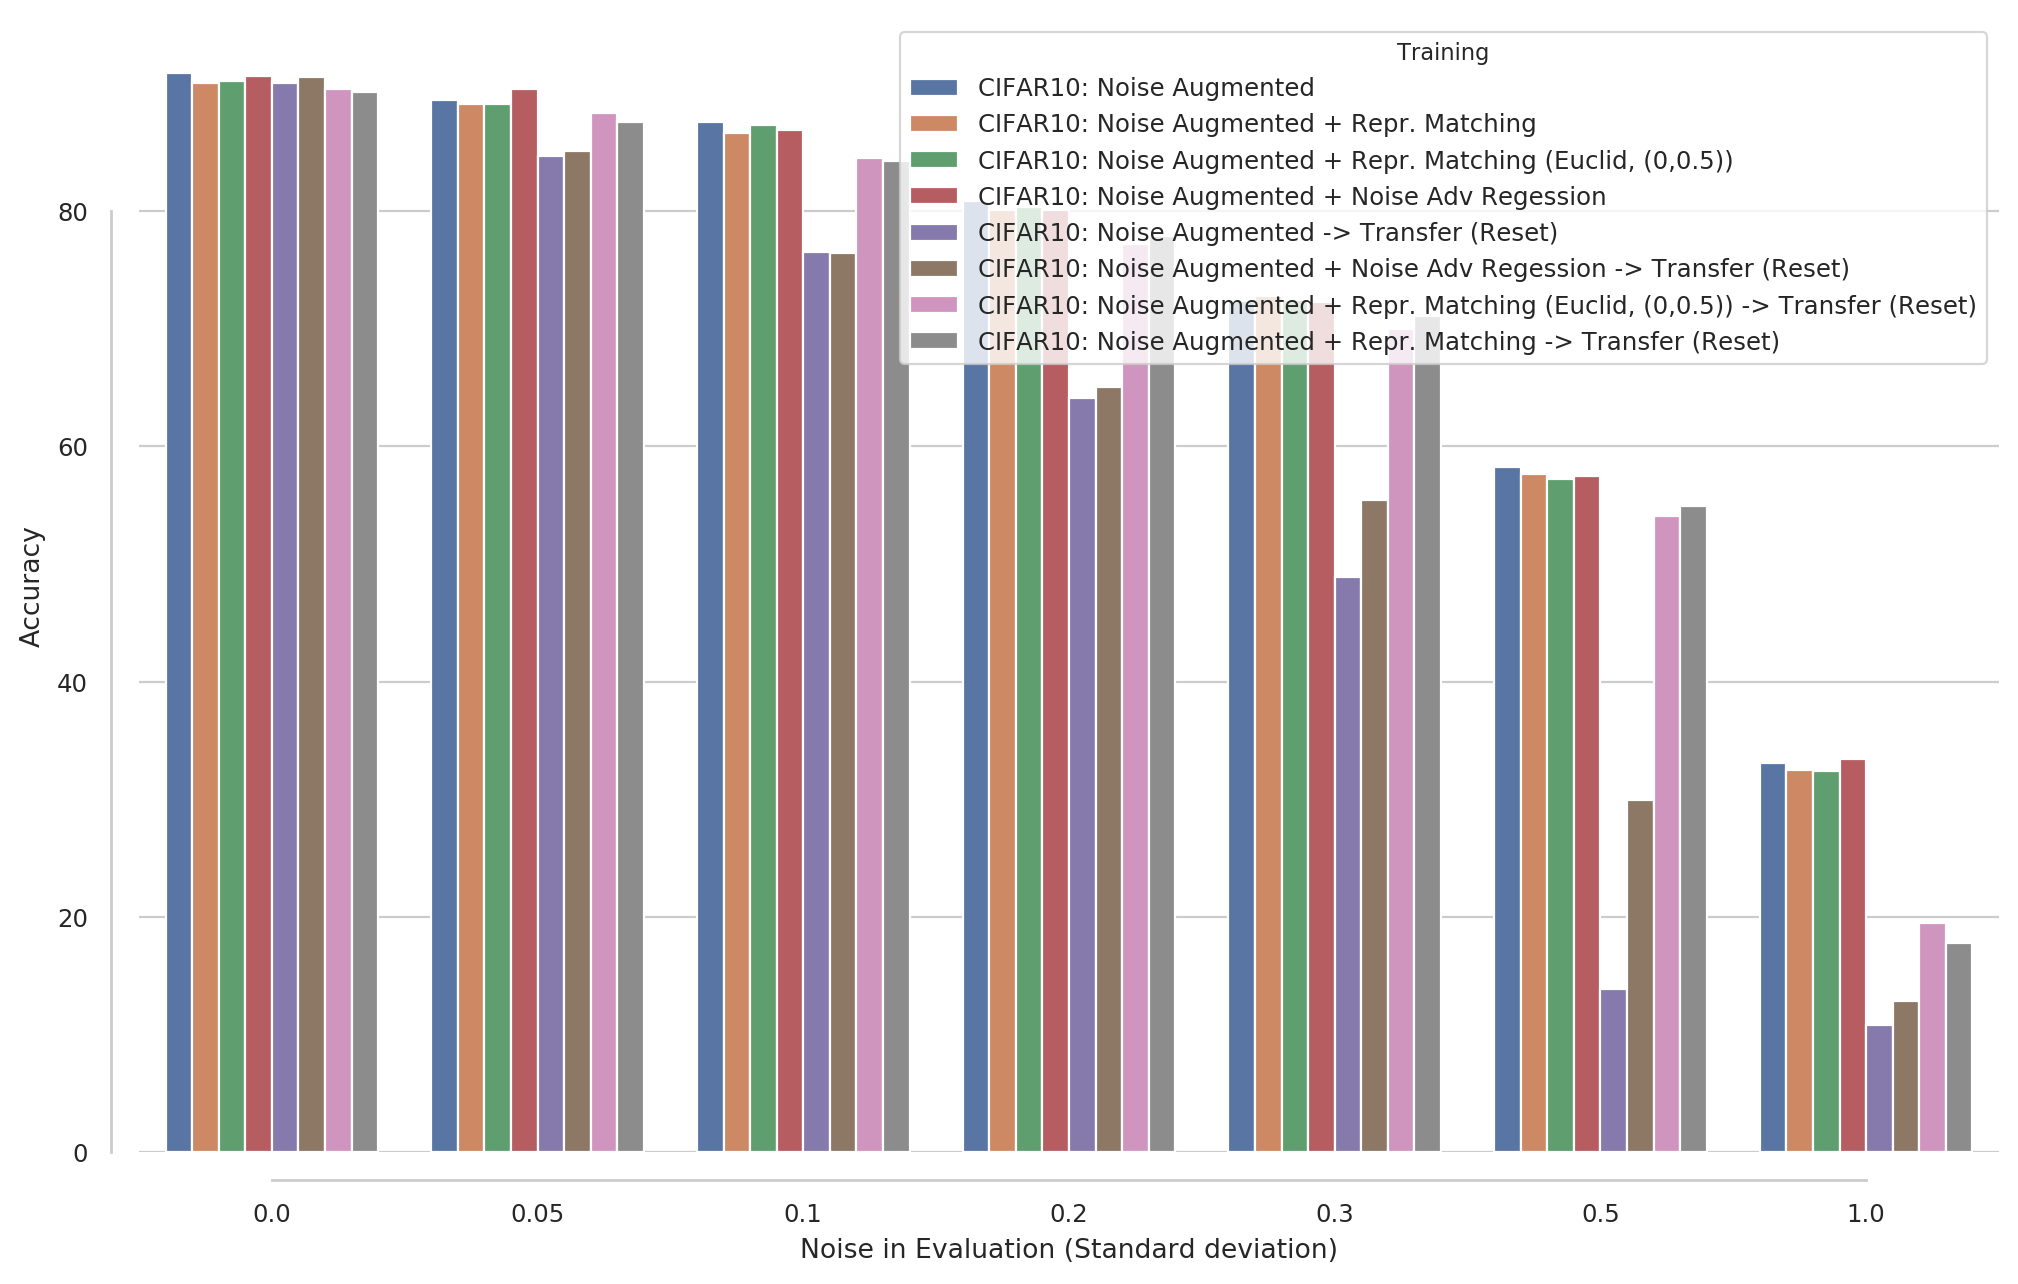

In [25]:
x = analysis.plot(to_plot="dev_noise_acc", 
       noise_measure="std",
       kind=None, 
       plot_method=sns.barplot,
#         save="/work/tin",
        style="lightpaper"
       )